# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the Dataset

In [2]:
# Imports dataset
traindataset = pd.read_parquet('training.parquet', engine='pyarrow')
testdataset = pd.read_parquet('testing.parquet', engine='pyarrow')
#dataset = pd.concat([traindataset, testdataset])
#Imports X and Y being the inputs and outputs of the data
# : is all of the rows, : is all of the columns
# by putting the -1 it removes the last column
Xtrain = traindataset.iloc[:, 1:-1].values
Ytrain = traindataset.iloc[:, -1:].values
Xtest = testdataset.iloc[:, 1:-1].values
Ytest = testdataset.iloc[:, -1:].values
#X = dataset.iloc[:, :-1].values
#Y = dataset.iloc[:, -1:].values

In [3]:
traindataset

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,https://www.todayshomeowner.com/how-to-make-ho...,82,23,0,2,7,0,0,0,0,...,1,1,0,240,8892,67860,0,1,4,legitimate
1,http://thapthan.ac.th/information/confirmation...,93,14,1,2,0,0,0,0,0,...,1,0,1,0,2996,4189860,0,1,2,phishing
2,http://app.dialoginsight.com/T/OFC4/L2S/3888/B...,121,21,1,3,0,0,0,0,0,...,1,1,0,30,2527,346022,0,1,3,phishing
3,https://www.bedslide.com,24,16,0,2,0,0,0,0,0,...,0,0,0,139,7531,1059151,0,0,4,legitimate
4,https://tabs.ultimate-guitar.com/s/sex_pistols...,73,24,0,3,1,0,0,0,0,...,0,0,0,3002,7590,635,0,1,5,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,https://snip.ly/www.netflix.com-signIn-account...,63,7,0,3,2,0,1,0,0,...,1,0,0,0,2344,13667,0,1,6,phishing
7654,http://webchat.freenode.net/,28,20,0,2,0,0,0,0,0,...,1,0,0,1813,6588,140438,0,0,6,legitimate
7655,http://mr-statucki.com/wp-content/uploads/2009...,67,15,0,2,2,0,0,0,0,...,1,1,0,100,5014,0,0,1,0,phishing
7656,https://www.computerhope.com/jargon/c/cdrom.htm,47,20,0,3,0,0,0,0,0,...,1,1,0,3482,8045,2580,0,0,6,legitimate


# Data Preprocessing

## Take Care of Missing Data

In [4]:
#runs through Xtrain
#imports the imputer
from sklearn.impute import SimpleImputer
#tells the imputer that you're changing missing_values (which are represented in numpy as nan) to the mean of the column
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
#you're changing values in columns 1-3
imputer.fit(Xtrain[:,1:88])
#replaces X with the changed values
Xtrain[:, 1:88] = imputer.transform (Xtrain[:, 1:88])

In [5]:
#runs through Xtest
#imports the imputer
from sklearn.impute import SimpleImputer
#tells the imputer that you're changing missing_values (which are represented in numpy as nan) to the mean of the column
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
#you're changing values in columns 1-3
imputer.fit(Xtest[:,1:88])
#replaces X with the changed values
Xtest[:, 1:88] = imputer.transform (Xtest[:, 1:88])

## Encode Categorical Data

In [6]:
#Encoding Ytest
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytestarray = Ytest.ravel()
Ytest = le.fit_transform(Ytestarray)

In [7]:
#Encoding Ytrain
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytrainarray = Ytrain.ravel()
Ytrain = le.fit_transform(Ytrainarray)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

#using standard scaling to scale the X values so they are easier to process
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

# Training Models

## Training KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier()

## Training Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

#had to do some fancy logistic regression to avoid an error
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
classifier.fit(Xtrain,Ytrain)


LogisticRegression(max_iter=1000)

## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion="gini",random_state=42, max_depth=3, min_samples_leaf=5)
clf_gini.fit(Xtrain, Ytrain)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

## Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(Xtrain, Ytrain)

GaussianNB()

## Support Vector Machine

In [14]:
from sklearn import svm 
clf = svm.SVC(kernel='linear') 
clf.fit(Xtrain, Ytrain)

SVC(kernel='linear')

# Predicting New Data

In [15]:
#KNN
knnYpred = knn.predict(Xtest)
#Logistic Regression
LogRegYpred = classifier.predict(Xtest)
#Decision Tree
DecTreeYpred = clf_gini.predict(Xtest)
#Random Forest
RForestYpred = rf.predict(Xtest)
#Naive Bayes
NBYpred = NB.predict(Xtest)
#Support Vector Machine
SVMYpred = clf.predict(Xtest)

#making arrays to easily iterate through all of the results later in the code
Ypreds = [knnYpred, LogRegYpred, DecTreeYpred, RForestYpred, NBYpred, SVMYpred]
Names = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "Support Vector Machine"]

# Checking Accuracy

In [16]:
from sklearn import metrics

# Store accuracy scores and model names in a list of tuples
results = [
    ("KNN", metrics.accuracy_score(Ytest, knnYpred)),
    ("Logistic Regression", metrics.accuracy_score(Ytest, LogRegYpred)),
    ("Decision Tree", metrics.accuracy_score(Ytest, DecTreeYpred)),
    ("Random Forest", metrics.accuracy_score(Ytest, RForestYpred)),
    ("Naive Bayes", metrics.accuracy_score(Ytest, NBYpred)),
    ("Support Vector Machine", metrics.accuracy_score(Ytest, SVMYpred))
]

# Sort the list in-place based on the accuracy scores in descending order
results.sort(key=lambda tup: tup[1], reverse=True)

# Print the sorted results with a numerical ranking
for rank, (name, accuracy) in enumerate(results, start=1):
    print(f"{rank}. {name} Accuracy: {accuracy}")


1. Random Forest Accuracy: 0.9636797454931071
2. Support Vector Machine Accuracy: 0.9435312831389183
3. Logistic Regression Accuracy: 0.9422057264050901
4. KNN Accuracy: 0.9382290562036055
5. Decision Tree Accuracy: 0.9088016967126193
6. Naive Bayes Accuracy: 0.6853128313891834


## Confusion Matrices

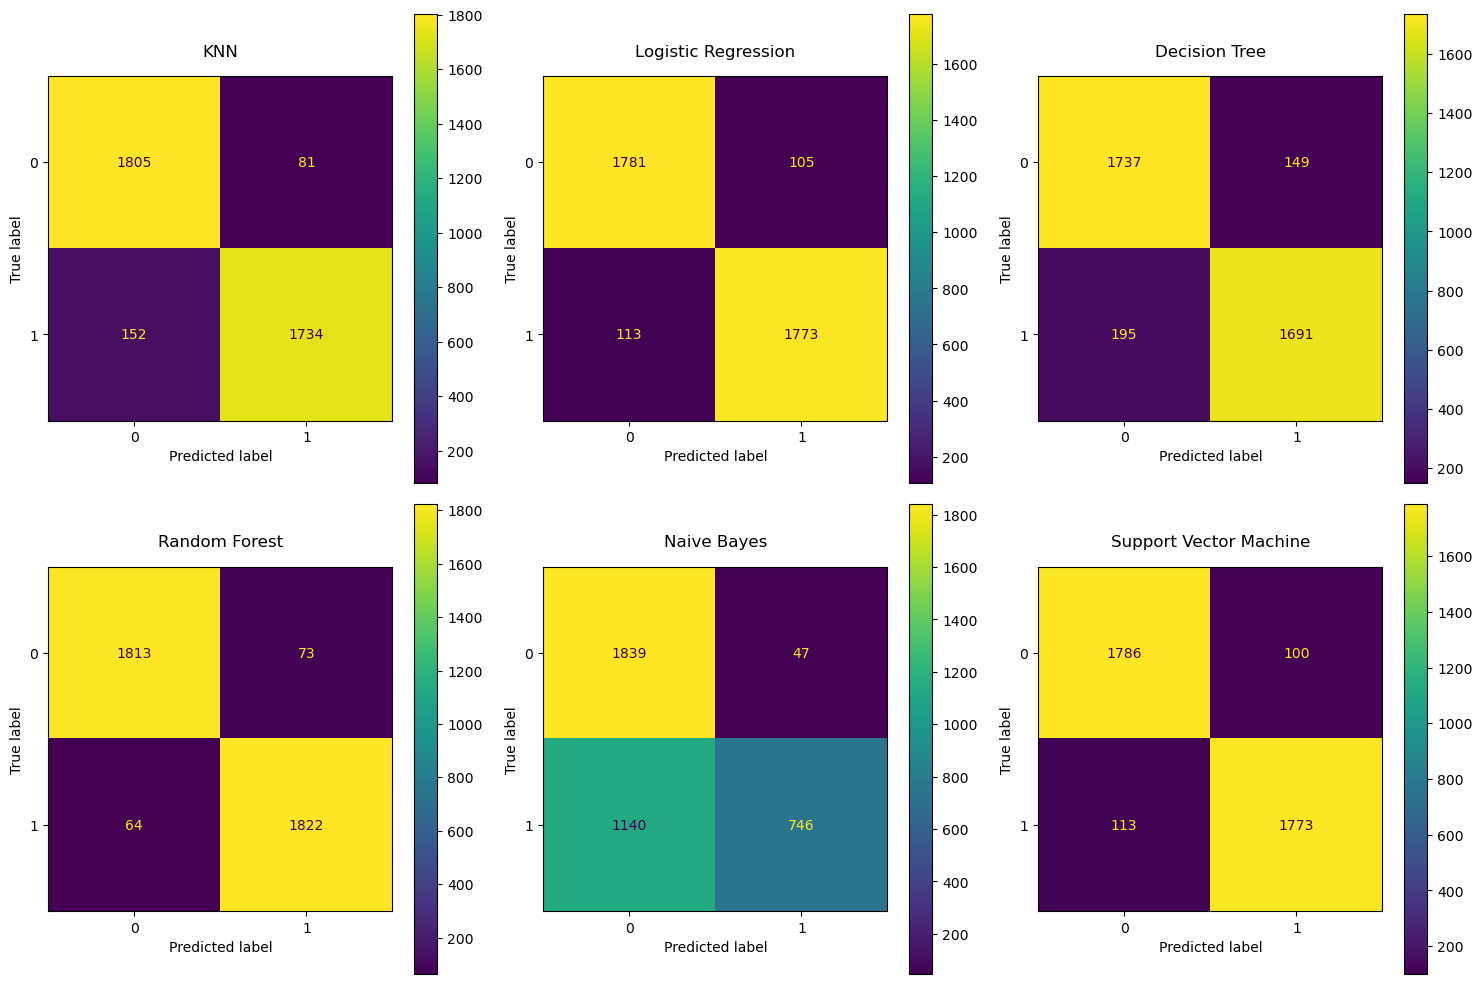

In [17]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

# Determine the number of confusion matrices
num_matrices = len(Ypreds)

# Calculate the number of rows needed
num_rows = int(np.ceil(num_matrices / 3)) # Adjust the division factor based on how many matrices you want per row

# Create a figure with a grid of subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5)) # Adjust figsize as needed

# Flatten the axs array for easier iteration
axs = axs.flatten()

for i, (Ypred, name) in enumerate(zip(Ypreds, Names)):
    cm = confusion_matrix(Ytest, Ypred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    
    # Plot each confusion matrix in its own subplot
    disp.plot(ax=axs[i])
    
    # Add name label above each subplot
    axs[i].text(0.5, 1.05, name, color='black', fontsize=12, ha='center', va='bottom', transform=axs[i].transAxes)

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the figure with all subplots
plt.show()


In [18]:
#don't want bottom left, so naive bays is horrible and random forest is best ^^
#top right means that it was not malicious but was marked as malicious
#bottem left means that it was malicious but marked as safe